In [27]:
#loading the data
import pandas as pd;
data = pd.read_csv('owid-covid-data.csv');
print(data)


       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   
...         ...       ...          ...         ...          ...        ...   
429430      ZWE    Africa     Zimbabwe  2024-07-31     266386.0        0.0   
429431      ZWE    Africa     Zimbabwe  2024-08-01     266386.0        0.0   
429432      ZWE    Africa     Zimbabwe  2024-08-02     266386.0        0.0   
429433      ZWE    Africa     Zimbabwe  2024-08-03     266386.0        0.0   
429434      ZWE    Africa     Zimbabwe  2024-08-04     266386.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

In [3]:
#checking the columns 
print(data.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
#previewing rows
print(data.head)

<bound method NDFrame.head of        iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   
...         ...       ...          ...         ...          ...        ...   
429430      ZWE    Africa     Zimbabwe  2024-07-31     266386.0        0.0   
429431      ZWE    Africa     Zimbabwe  2024-08-01     266386.0        0.0   
429432      ZWE    Africa     Zimbabwe  2024-08-02     266386.0        0.0   
429433      ZWE    Africa     Zimbabwe  2024-08-03     266386.0        0.0   
429434      ZWE    Africa     Zimbabwe  2024-08-04     266386.0        0.0   

        new_cases_smoothed  total

In [5]:
#identifying any missing values
missing_values = data.isnull().sum()
print(missing_values)

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64


In [3]:
#filtering data based on interested countries
countries_of_interest = ['Kenya', 'USA', 'Rwanda', 'Afghanistan', 'India']
filtered_data = data[data['location'].isin(countries_of_interest)]

print(filtered_data)

       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   
...         ...       ...          ...         ...          ...        ...   
319426      RWA    Africa       Rwanda  2024-07-31     133264.0        0.0   
319427      RWA    Africa       Rwanda  2024-08-01     133264.0        0.0   
319428      RWA    Africa       Rwanda  2024-08-02     133264.0        0.0   
319429      RWA    Africa       Rwanda  2024-08-03     133264.0        0.0   
319430      RWA    Africa       Rwanda  2024-08-04     133264.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

In [9]:
#droping rows with mising dates, location, total_cases, total_deaths,
#new_cases and creating a new csv file
data_cleaned = data.dropna(subset=['date', 'location', 'total_cases', 'total_deaths', 'new_cases'])

data_cleaned.to_csv('cleaned_dataset.csv', index=False)
print(data_cleaned.head(20))

   iso_code continent     location        date  total_cases  new_cases  \
0       AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1       AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2       AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3       AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4       AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   
5       AFG      Asia  Afghanistan  2020-01-10          0.0        0.0   
6       AFG      Asia  Afghanistan  2020-01-11          0.0        0.0   
7       AFG      Asia  Afghanistan  2020-01-12          0.0        0.0   
8       AFG      Asia  Afghanistan  2020-01-13          0.0        0.0   
9       AFG      Asia  Afghanistan  2020-01-14          0.0        0.0   
10      AFG      Asia  Afghanistan  2020-01-15          0.0        0.0   
11      AFG      Asia  Afghanistan  2020-01-16          0.0        0.0   
12      AFG      Asia  Afghanistan  20

In [11]:
#converting date column to datetime
data['date'] = pd.to_datetime(data['date'])

print(data['date'].dtypes)


datetime64[ns]


In [13]:
#handling missing numeric values with fillna()
data[['total_cases','total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']] = data[['total_cases','total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']].fillna(0)
print(data.head(10))

  iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan 2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan 2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan 2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan 2020-01-09          0.0        0.0   
5      AFG      Asia  Afghanistan 2020-01-10          0.0        0.0   
6      AFG      Asia  Afghanistan 2020-01-11          0.0        0.0   
7      AFG      Asia  Afghanistan 2020-01-12          0.0        0.0   
8      AFG      Asia  Afghanistan 2020-01-13          0.0        0.0   
9      AFG      Asia  Afghanistan 2020-01-14          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0      

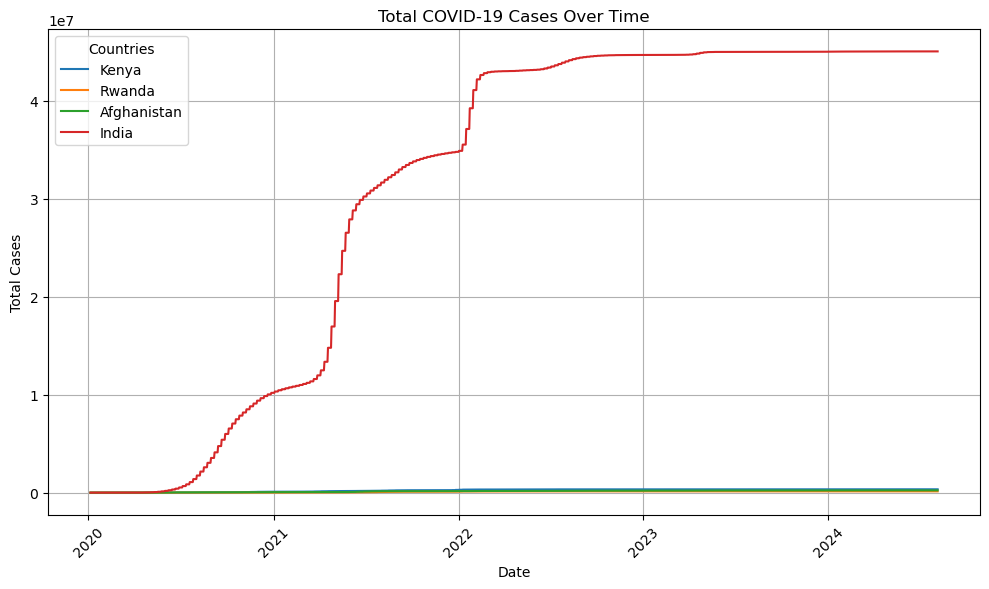

In [13]:
#Data Analysis

#ploting total cases over time
import matplotlib.pyplot as plt

#defining the countries
countries = ['Kenya', 'Rwanda', 'Afghanistan', 'India']
plt.figure(figsize=(10, 6))

for country in countries:
    country_data = filtered_data[filtered_data['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)


plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend(title='Countries')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


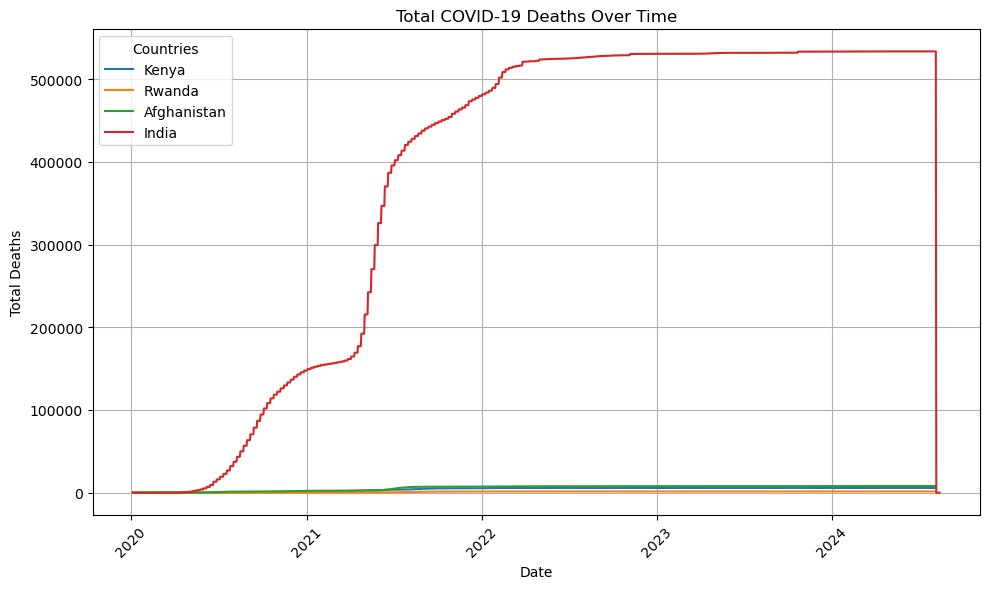

In [24]:
#Total deaths over time
countries = ['Kenya', 'Rwanda', 'Afghanistan', 'India']
plt.figure(figsize=(10, 6))

for country in countries:
    country_data = filtered_data[filtered_data['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)


plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend(title='Countries')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

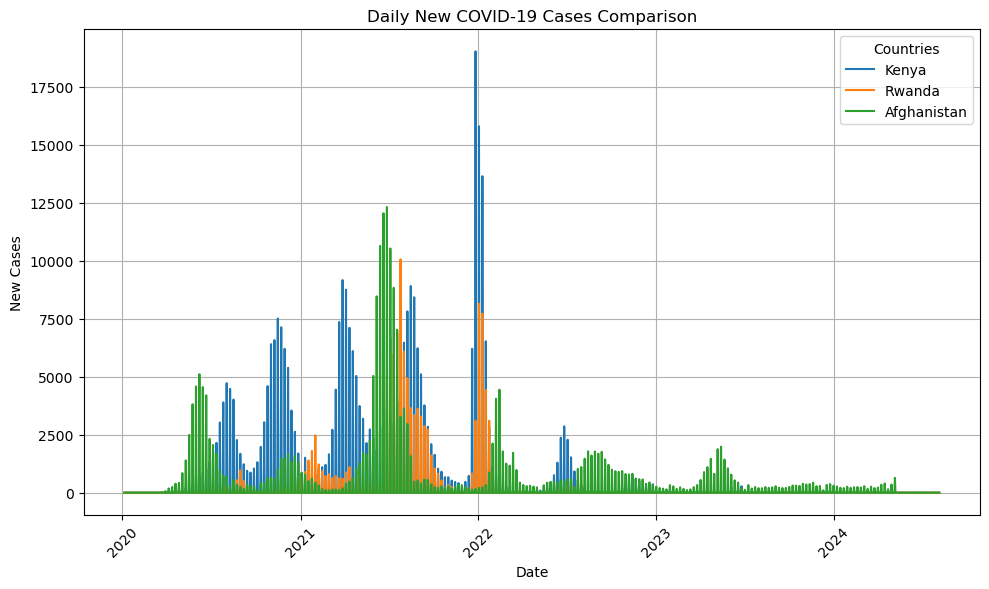

In [26]:
#Comparing daily new cases between countries
countries = ['Kenya', 'Rwanda', 'Afghanistan']
plt.figure(figsize=(10, 6))

for country in countries:
    country_data = filtered_data[filtered_data['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)


plt.title('Daily New COVID-19 Cases Comparison')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend(title='Countries')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:

#Avoiding copy warning by making a copy of filtered data
filtered_data = filtered_data.copy()

#calculating death_rate while handling division and missing values
filtered_data['death_rate'] = (
    filtered_data['total_deaths'] / filtered_data['total_cases']
).replace([float('inf'), -float('inf')], 0).fillna(0)

print(filtered_data['death_rate'])


0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
319426    0.011016
319427    0.011016
319428    0.011016
319429    0.011016
319430    0.011016
Name: death_rate, Length: 6704, dtype: float64


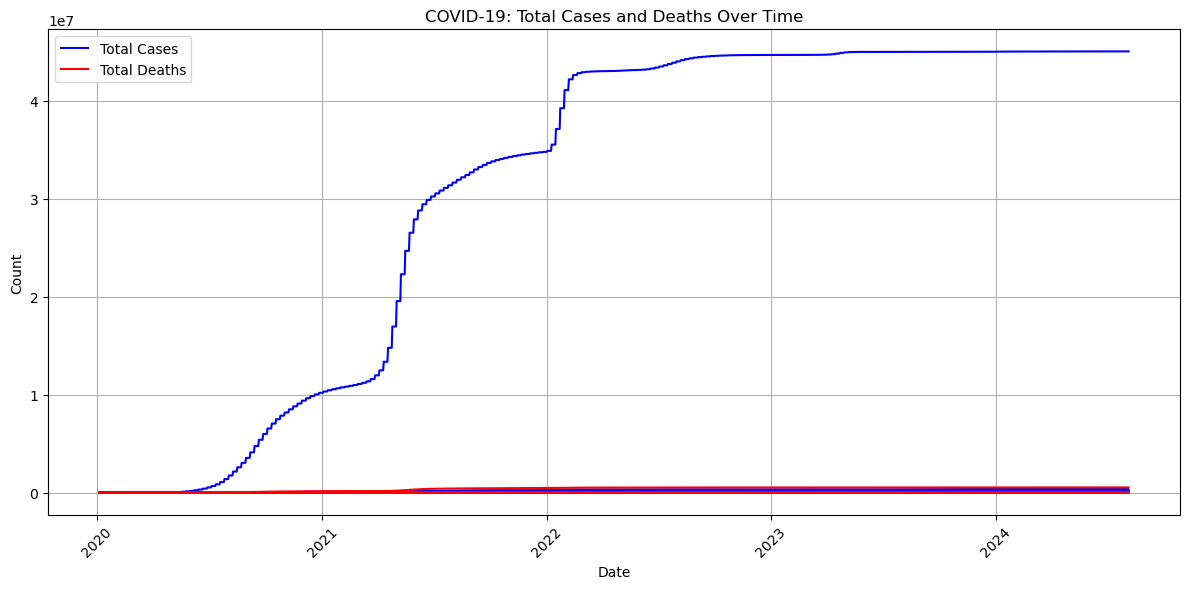

In [14]:
#cases & deaths over time.
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['date'], filtered_data['total_cases'], label='Total Cases', color='blue')
plt.plot(filtered_data['date'], filtered_data['total_deaths'], label='Total Deaths', color='red')

plt.title('COVID-19: Total Cases and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:

# Group by country and get the maximum total cases per country
top_cases = data.groupby('location')['total_cases'].max().sort_values(ascending=False).head(10)

print(top_cases)

location
World                            775866783.0
High-income countries            429044049.0
Asia                             301499099.0
Europe                           252916868.0
Upper-middle-income countries    251753518.0
European Union (27)              185822587.0
North America                    124492666.0
United States                    103436829.0
China                             99373219.0
Lower-middle-income countries     91954400.0
Name: total_cases, dtype: float64


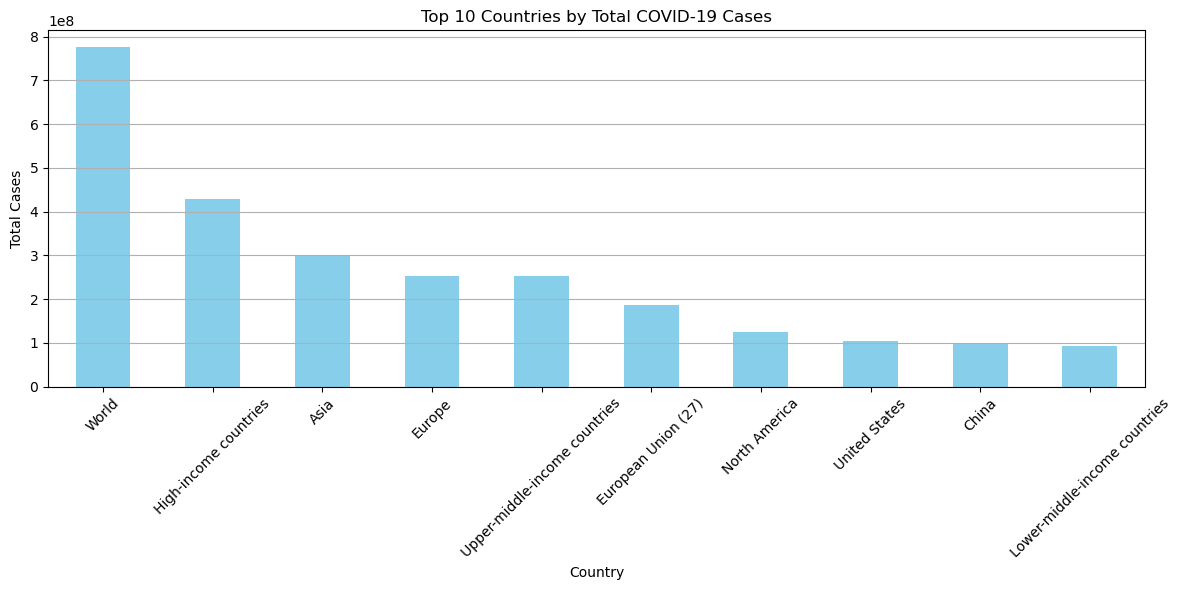

In [17]:
# Plot bar chart
plt.figure(figsize=(12, 6))
top_cases.plot(kind='bar', color='skyblue')

# Customize the chart
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


In [18]:
#Heatmaps
import seaborn as sns

# Select only numeric columns of interest
numeric_columns = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']
correlation_data = data[numeric_columns].dropna()

# Compute correlation matrix
corr_matrix = correlation_data.corr()

print(corr_matrix)

                    total_cases  total_deaths  new_cases  new_deaths  \
total_cases            1.000000      0.956895   0.122622    0.098955   
total_deaths           0.956895      1.000000   0.150853    0.164604   
new_cases              0.122622      0.150853   1.000000    0.516476   
new_deaths             0.098955      0.164604   0.516476    1.000000   
total_vaccinations     0.914850      0.867335   0.136748    0.091976   

                    total_vaccinations  
total_cases                   0.914850  
total_deaths                  0.867335  
new_cases                     0.136748  
new_deaths                    0.091976  
total_vaccinations            1.000000  


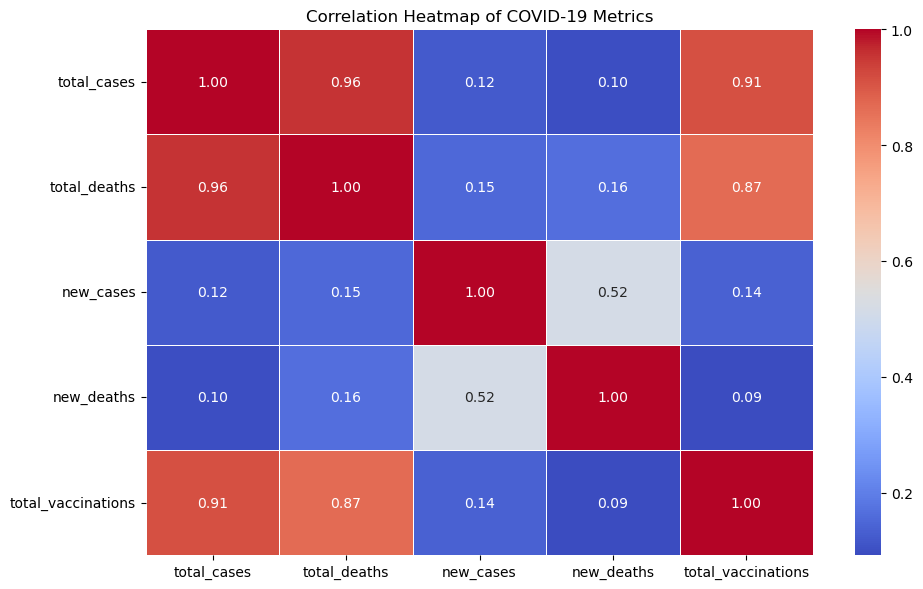

In [19]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title and layout
plt.title('Correlation Heatmap of COVID-19 Metrics')
plt.tight_layout()
plt.show()


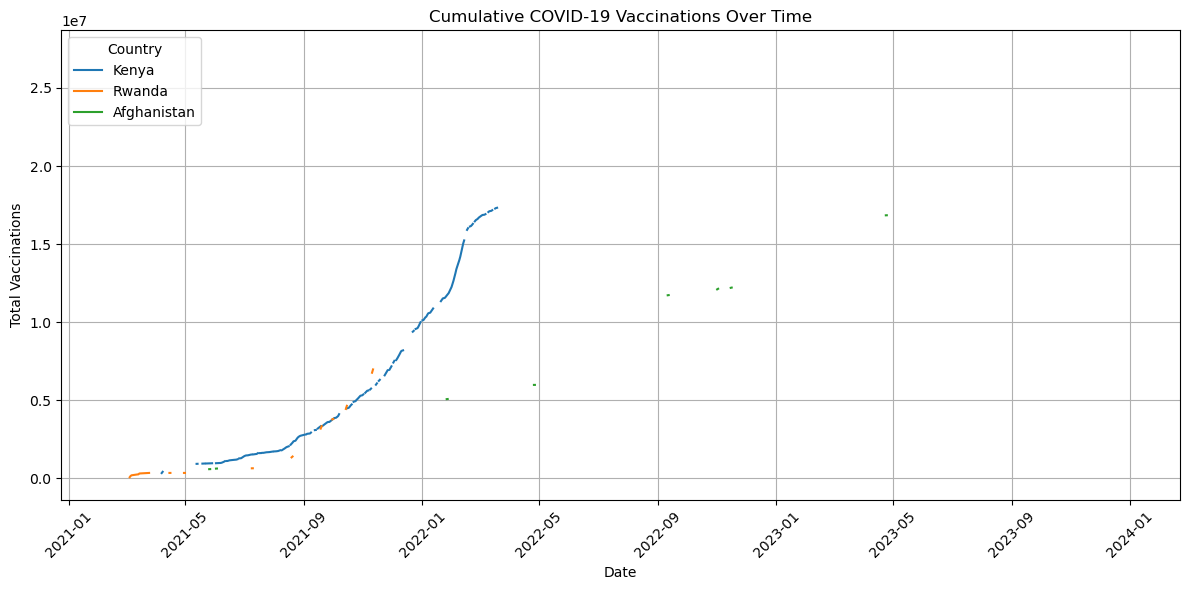

In [30]:
#visualizing vaccination process
countries = ['Kenya', 'Rwanda', 'Afghanistan']
plt.figure(figsize=(12, 6))

for country in countries:
    country_data = filtered_data[filtered_data['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
#comparing % vaccinated population
latest_data = data[data['location'].isin(countries)].copy()
latest_data['date'] = pd.to_datetime(latest_data['date'])

# Get the most recent entry for each country
latest_vacc = latest_data.sort_values('date').groupby('location').tail(1)


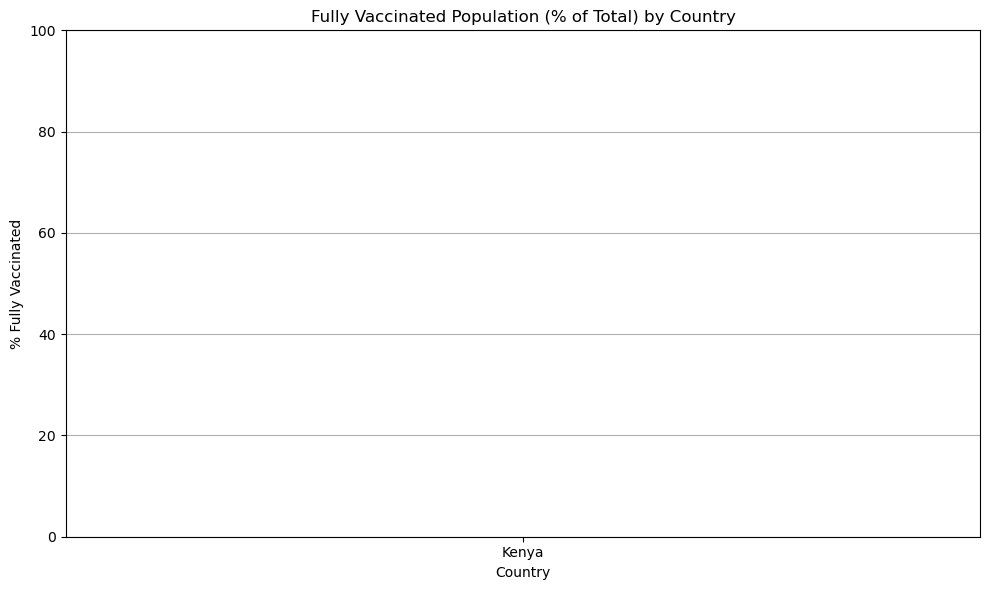

In [33]:
#ploting
plt.figure(figsize=(10, 6))
plt.bar(latest_vacc['location'], latest_vacc['people_fully_vaccinated_per_hundred'], color='teal')

plt.title('Fully Vaccinated Population (% of Total) by Country')
plt.ylabel('% Fully Vaccinated')
plt.xlabel('Country')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


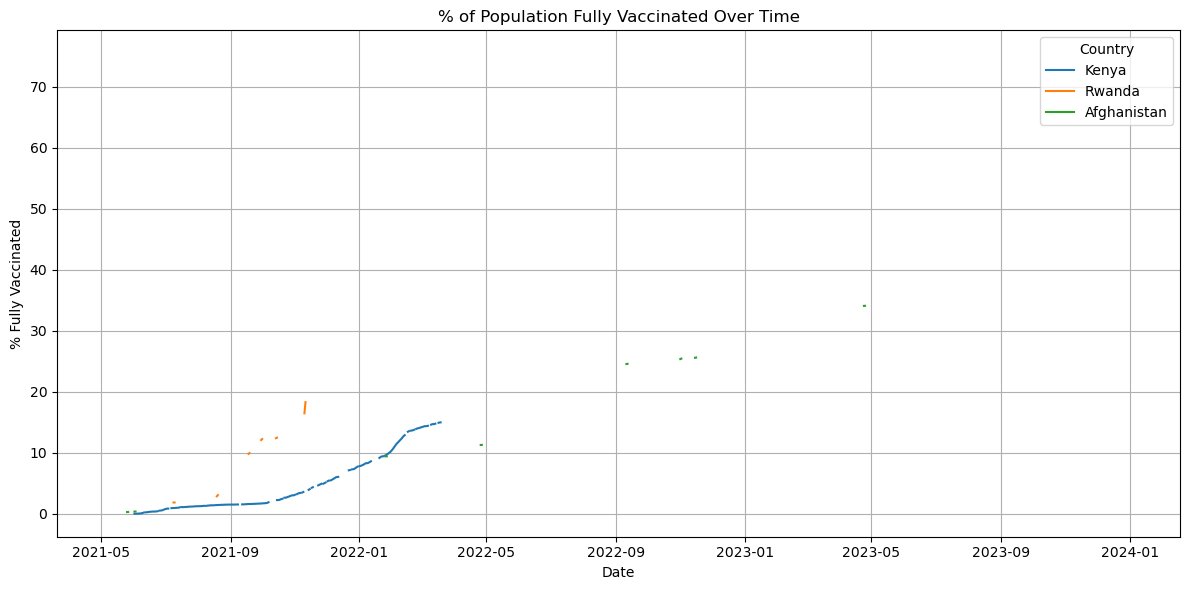

In [36]:
#line chart
plt.figure(figsize=(12, 6))

for country in countries:
    country_data = filtered_data[filtered_data['location'] == country]
    plt.plot(
        country_data['date'],
        country_data['people_fully_vaccinated_per_hundred'],
        label=country
    )

plt.title('% of Population Fully Vaccinated Over Time')
plt.xlabel('Date')
plt.ylabel('% Fully Vaccinated')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()



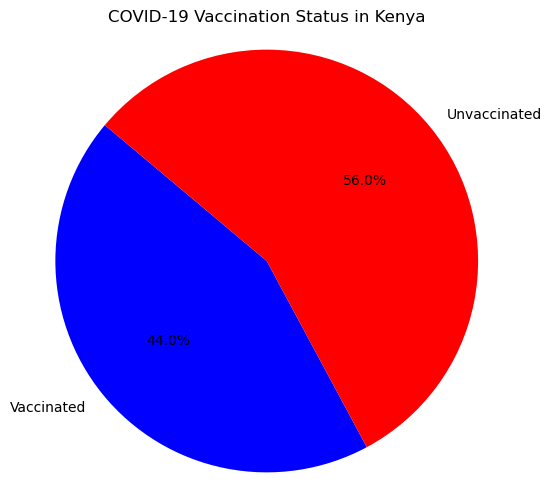

In [41]:
import numpy as np

# Example: Kenya (adjust country name as needed)
country = 'Kenya'
country_data = filtered_data[filtered_data['location'] == country].copy()

# Get the latest data entry for the country
latest = country_data.dropna(subset=['total_vaccinations', 'population']).iloc[-1]

# Extract values safely
vaccinated = latest['total_vaccinations']
population = latest['population']

# Basic validation
if not np.isfinite(vaccinated) or not np.isfinite(population) or population == 0:
    print("Invalid data for pie chart.")
else:
    unvaccinated = population - vaccinated
    unvaccinated = max(0, unvaccinated)  # Prevent negative

    labels = ['Vaccinated', 'Unvaccinated']
    sizes = [vaccinated, unvaccinated]
    colors = ['blue', 'red']

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title(f'COVID-19 Vaccination Status in {country}')
    plt.axis('equal')
    plt.show()


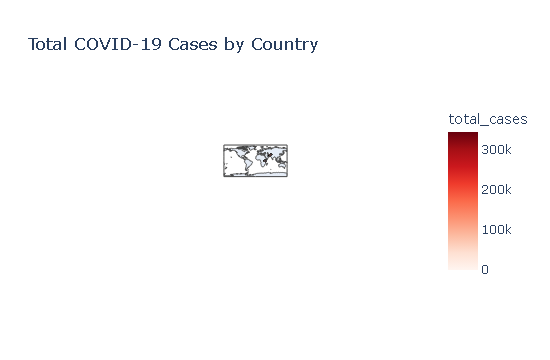

In [37]:
import plotly.express as px

#filter to latest data 
#latest_data = data.sort_values('date').groupby('location').tail()

#remove entries that are not countries
#latest_data = latest_data[latest_data['iso_code'].str.len() == 3]

#create the map
fig = px.choropleth(
    latest_data,
    locations="iso_code",
    color="total_cases",  # or 'total_deaths', 'total_tests'
    hover_name="location",
    color_continuous_scale="Reds",
    title="Total COVID-19 Cases by Country"
)

fig.show()


# Key insights

# Kenya Had a Delayed Start with Slower Growth
-Kenya's vaccination rollout started later and remained slower compared to the USA and India. It experienced a steady but gradual rise in total vaccinations with no significant spikes.

# India’s Vaccination Surge Came Mid-2021
- India began vaccinations more slowly, but a notable surge occurred around  mid-2021. The total number of vaccinated individuals increased rapidly in a short period, showing the country's large-scale mobilization.

## Anomalies
- Sudden Spikes in Daily Cases
In both India and the USA, there were unexpected sharp spikes in total or daily cases on specific dates. These likely reflect backlog data dumps or changes in reporting methods, not actual outbreaks.

- Flatlines in Data
Some periods—especially in Kenya—exhibited flatlines in total case or vaccination numbers. These may be due to delays in reporting, data collection issues, or weekend/holiday effects when fewer updates are made.


- Inconsistent Vaccination-to-Case Ratio
In countries like Kenya, even as vaccinations increased, the decline in total cases was not as sharp as in other countries. This could indicate vaccine hesitancy, logistical challenges, or differences in variant spread and testing rates.